# Regresión logística

La regresión lineal se utiliza para predecir una variable de salida numérica continua, ajustando una relación lineal entre las variables de entrada. El objetivo de la regresión lineal es encontrar la línea que mejor se ajuste
y que minimize el errore cuadrático medio entre los valores previstos y los reales.

La regresión logística se usa para predecir una variable de salida binaria, generalmente un 0 o un 1. Modela la probabilidad de que la variable de salida tome un valor determinado, dadas las variables de entrada. Lo hace ajustando una función logística (también conocida como función sigmoidea) a las variables de entrada. La función logística asigna cualquier valor de entrada a un valor entre 0 y 1, que se puede interpretar como la probabilidad de que la variable de salida sea 1.

La principal diferencia entre la regresión lineal y la regresión logística es el tipo de variable de salida que predicen. La regresión lineal predice una salida numérica continua, mientras que la regresión logística predice una variable de salida binaria modelando la probabilidad de que la variable de salida tome un valor determinado.

## Función sigmoide

$
f(x)=\sigma(x)=\frac{1}{1+e^{β₀ + β₁x₁ + β₂x₂ +…+ βₐxₐ + ε}}
$

La regresión logística transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1.

https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica

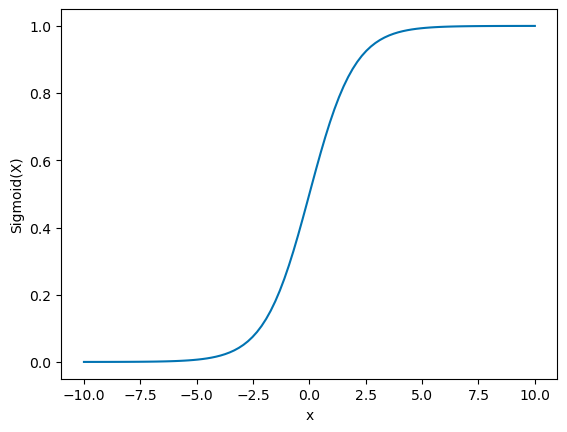

In [87]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

In [88]:
import seaborn as sns 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.metrics import mean_squared_error, r2_score # error
from sklearn import metrics

In [89]:
datos = pd.read_csv('../datasets/salary_data.csv')
datos

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [90]:
datos['IsHighSalary'] = datos['Salary'] >= 100000
datos['IsHighSalary'] = pd.get_dummies(datos['IsHighSalary'], drop_first=True)
datos

,YearsExperience,Salary,IsHighSalary
0,1.1,39343.0,0
1,1.3,46205.0,0
2,1.5,37731.0,0
3,2.0,43525.0,0
4,2.2,39891.0,0
5,2.9,56642.0,0
6,3.0,60150.0,0
7,3.2,54445.0,0
8,3.2,64445.0,0
9,3.7,57189.0,0


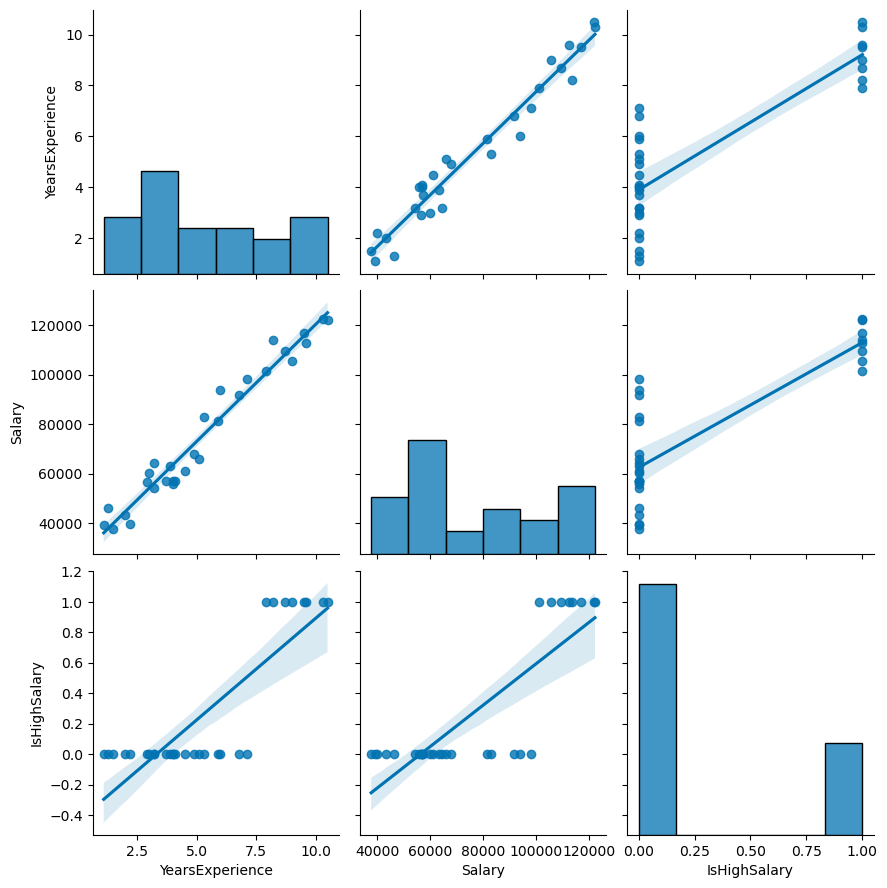

In [91]:
sns.set_palette('colorblind')
sns.pairplot(datos, height=3,kind = 'reg')

In [92]:
x = datos['YearsExperience']
y = datos['IsHighSalary']

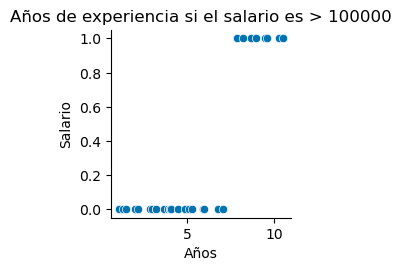

In [93]:
sns.pairplot(datos,x_vars=['YearsExperience'],y_vars=['IsHighSalary'],kind='scatter')
plt.xlabel('Años')
plt.ylabel('Salario')
plt.title('Años de experiencia si el salario es > 100000')
plt.show()

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state=10)

In [95]:
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

/tmp/ipykernel_89113/241357539.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:,np.newaxis]
/tmp/ipykernel_89113/241357539.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:,np.newaxis]


In [96]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [97]:
y_pred = lr.predict(x_test)
print('beta_0:',lr.intercept_)
print('beta_1:',lr.coef_)


beta_0: [-10.58424653]
beta_1: [[1.50189828]]


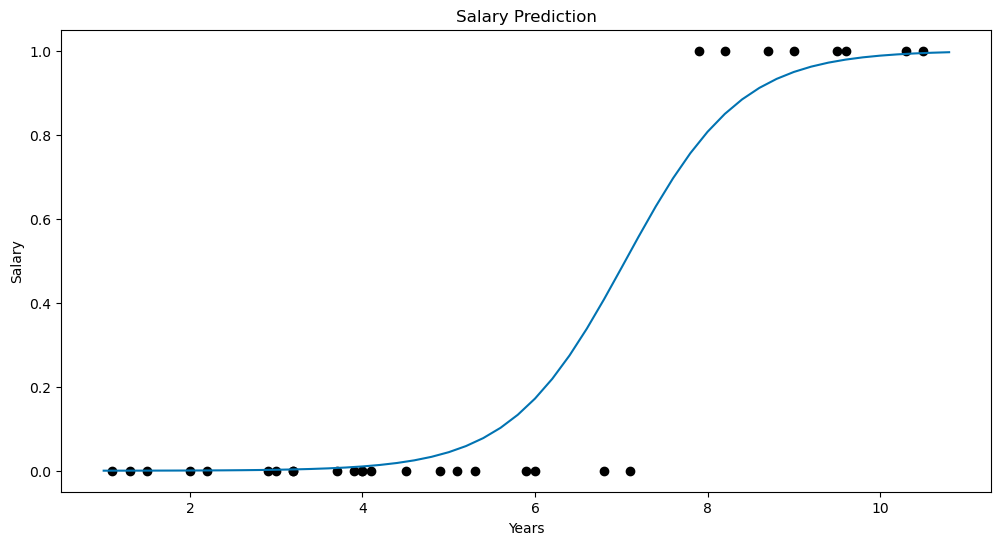

In [98]:
def model(x):
    exponent = lr.intercept_ + lr.coef_[0] * x
    return 1/(1+math.exp(-exponent))

x = np.arange(1, 11., 0.2)
sig = [model(i) for i in x]


plt.figure(figsize=(12,6))
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.scatter(datos['YearsExperience'], datos['IsHighSalary'], c='black')
plt.plot(x,sig)
plt.show()

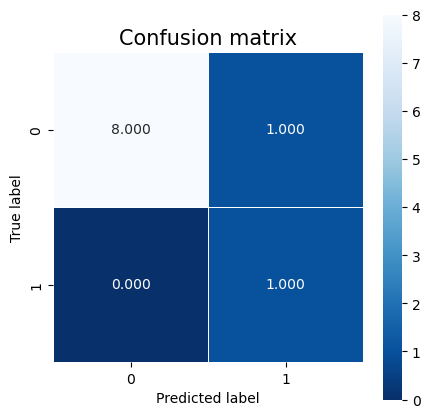

In [101]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', size = 15);

<div> <img src="fig/matrix.png" alt="Drawing" style="width: 1000px;"/></div>

https://rapidminer.com/glossary/confusion-matrix/
